#### Creating sample data

In [1]:
from sklearn import datasets as d
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#regression dataset
reg_data = d.make_regression()
reg_data[0].shape

(100, 100)

In [3]:
#to generate complex dataset 1000 x 10 matrix with 5 features responsible for target creation, 
#underlying bias factor of 1.0 and 2 targets 

complex_reg_data = d.make_regression(1000,10,n_informative=5, bias=1.0, n_targets=2)
complex_reg_data[0].shape

(1000, 10)

In [4]:
#Creating an unbalanced classification dataset 

classification_set = d.make_classification(weights=[0.1])
np.bincount(classification_set[1])

array([11, 89], dtype=int64)

In [5]:
#creating a dataset for clustering 

blobs_data, blobs_target = d.make_blobs()

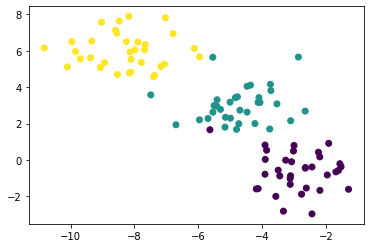

In [6]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.scatter(blobs_data[:,0],blobs_data[:,1],c=blobs_target)

###

#### Scaling dataset

In [7]:
from sklearn import preprocessing 
from sklearn.datasets import load_boston 
boston = load_boston()
X,y = boston.data, boston.target

In [8]:
X.shape

(506, 13)

In [9]:
y.shape

(506,)

In [10]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [11]:
X1,y1 = housing.data,housing.target

In [12]:
X1.shape

(20640, 8)

In [13]:
y1.shape

(20640,)

In [14]:
X[:,:3].mean(axis=0) #mean of the first 3 features 

array([ 3.61352356, 11.36363636, 11.13677866])

In [15]:
X[:,:3].std(axis=0)

array([ 8.59304135, 23.29939569,  6.85357058])

In [16]:
#Now scaling 

X_2 = preprocessing.scale(X[:,:3])
X_2.mean(axis=0)

array([-8.78743718e-17, -6.34319123e-16, -2.68291099e-15])

In [17]:
X_2.std(axis=0)

array([1., 1., 1.])

<AxesSubplot:>

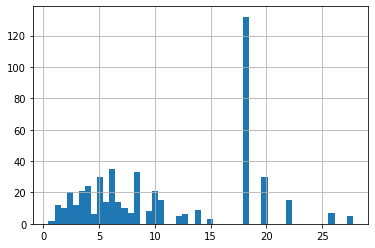

In [18]:
import pandas as pd 

pd.Series(X[:,2]).hist(bins=50)

<AxesSubplot:>

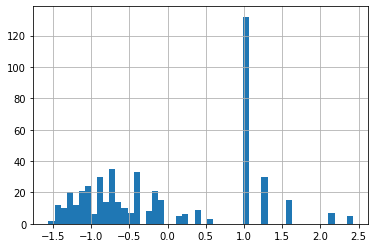

In [19]:
pd.Series(preprocessing.scale(X[:,2])).hist(bins=50)

In [20]:
#Another ways of scaling 

my_scaler = preprocessing.StandardScaler()
my_scaler.fit(X[:,:3])
my_scaler.transform(X[:,:3]).mean(axis=0)

array([-8.78743718e-17, -6.34319123e-16, -2.68291099e-15])

In [21]:
my_scaler.transform(X[:,:3]).std(axis=0)

array([1., 1., 1.])

In [22]:
my_minmax_scaler = preprocessing.MinMaxScaler()
my_minmax_scaler.fit(X[:,:3])
my_minmax_scaler.transform(X[:,:3]).max(axis=0)

array([1., 1., 1.])

In [23]:
my_minmax_scaler.transform(X[:,:3]).min(axis=0)

array([0., 0., 0.])

In [24]:
#To change Min and Max of MinMaxSccaler

my_odd_scaler = preprocessing.MinMaxScaler(feature_range=(-3.14,3.14)) 
my_odd_scaler.fit(X[:,:3])
my_odd_scaler.transform(X[:,:3]).max(axis=0)

array([3.14, 3.14, 3.14])

In [25]:
my_odd_scaler.transform(X[:,:3]).min(axis=0)

array([-3.14, -3.14, -3.14])

In [26]:
#Normalization - It scales each samples to have a length of ONE

normalized_X = preprocessing.normalize(X[:,:3])

##### Creating Binary features through THRESHOLDING

In [27]:
#With thresholding, we can turn a regression problem into a classification problem 

import numpy as np 
from sklearn.datasets import load_boston 

boston = load_boston()
X, y = boston.data, boston.target.reshape(-1,1)

In [28]:
X.shape

(506, 13)

In [29]:
#If we want to create a threshold value of the mean. 
#If the value is greater than the mean, produce 1; otherwise 0

from sklearn import preprocessing 
new_target = preprocessing.binarize(y,threshold = boston.target.mean())
new_target[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [30]:
#to check
(y[:5] > y.mean()).astype(int)

array([[1],
       [0],
       [1],
       [1],
       [1]])

##### Another way is `Binarizer`

In [31]:
binar = preprocessing.Binarizer(threshold=y.mean())
new_target = binar.fit_transform(y)
new_target[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [32]:
#In Sparse Matrices zeros aren't stored, so for the binarizer 
# a special condition of sparse metrices in that the thrseshold cannot be less than zero. 

from scipy.sparse import coo 
spar = coo.coo_matrix(np.random.binomial(1,.25,100))
preprocessing.binarize(spar, threshold=-1)

ValueError: Cannot binarize a sparse matrix with threshold < 0

##### Working with categorical variables

In [33]:
from sklearn import datasets 
import numpy as np 
iris = datasets.load_iris()

In [34]:
X = iris.data 
y = iris.target

In [35]:
#creating an encoder
from sklearn import preprocessing 
cat_encoder = preprocessing.OneHotEncoder()
cat_encoder.fit_transform(y.reshape(-1,1)).toarray()[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [36]:
#Next we will use multi-output regression and then compare it with multiclass classification 

from sklearn.linear_model import Ridge 
ridge_inst = Ridge() 

In [37]:
from sklearn.multioutput import MultiOutputRegressor 
multi_ridge = MultiOutputRegressor(ridge_inst, n_jobs=-1)

In [38]:
cat_encoder = preprocessing.OneHotEncoder()
y_multi = cat_encoder.fit_transform(y.reshape(-1,1)).toarray()

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y_multi, stratify=y, random_state=7)

In [40]:
#Fitting the multi-output estimator 
multi_ridge.fit(X_train, y_train)

MultiOutputRegressor(estimator=Ridge(), n_jobs=-1)

In [41]:
#predict the multi-outout target on the testing set: 

y_multi_pre = multi_ridge.predict(X_test)
y_multi_pre[:5]

array([[ 0.81327059,  0.37348962, -0.1867602 ],
       [ 0.9524035 ,  0.17877376, -0.13117727],
       [-0.01657826,  0.36538441,  0.65119386],
       [ 0.1772412 ,  0.47768186,  0.34507695],
       [ 0.87693053,  0.14905609, -0.02598662]])

In [42]:
#Using binarize to turn each number into an integer 0 or 1 

from sklearn import preprocessing 
y_multi_prediction = preprocessing.binarize(y_multi_pre, threshold=0.5)
y_multi_prediction[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [43]:
#Next measure over-all multi-output performance with the roc_auc_score 

from sklearn.metrics import roc_auc_score 
roc_auc_score(y_test, y_multi_pre)

0.9198717948717948

In [46]:
#Doing it flower by flower, column by column

from sklearn.metrics import accuracy_score 

print("Multi-Output Scores for the Iris Flowers: ")
for column_number in range(0,3):
    print("Accuracy Score of flower " + str(column_number),
          accuracy_score(y_test[:,column_number], y_multi_prediction[:,column_number]))
    print("AUC Score of flower " + str(column_number),roc_auc_score(y_test[:,column_number],y_multi_prediction[:,column_number]))
    print("")

Multi-Output Scores for the Iris Flowers: 
Accuracy Score of flower 0 1.0
AUC Score of flower 0 1.0

Accuracy Score of flower 1 0.7368421052631579
AUC Score of flower 1 0.6523076923076923

Accuracy Score of flower 2 0.9736842105263158
AUC Score of flower 2 0.9807692307692308



In [ ]:
#This, however, is because we assumed there is a fourth column wher flower is of none of the three types
#In these type of cases we can drop the last column and assume flower has to be one of the three types. 

In [48]:
#DICT-VECTORIZER - It can be used to directly convert strings to features 

from sklearn.feature_extraction import DictVectorizer 
dv = DictVectorizer()
my_dict = [{'species':iris.target_names[i]} for i in y]
dv.fit_transform(my_dict).toarray()[:5]


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])